In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = pd.read_csv('/content/medical_data.csv')
#df2 = pd.read_csv('train_dataset.csv')


#### Deleting the duplicated rows

In [2]:
df.drop_duplicates() # there is more 1000 duplicated row

Patient_Number  Level_of_Hemoglobin  Genetic_Pedigree_Coefficient  Age  \
0                  1                11.28                          0.90   34   
1                  2                 9.75                          0.23   54   
2                  3                10.79                          0.91   70   
3                  4                11.00                          0.43   71   
4                  5                14.17                          0.83   52   
...              ...                  ...                           ...  ...   
1995            1996                10.14                          0.02   69   
1996            1997                11.77                          1.00   24   
1997            1998                16.91                          0.22   18   
1998            1999                11.15                          0.72   46   
1999            2000                11.36                          0.09   41   

      BMI  Sex  Pregnancy  Smoking  Physical_activity  \
0      23    1        1.0        0              45961   
1      33    1        NaN        0              26106   
2      49    0        NaN        0               9995   
3      50    0        NaN        0              10635   
4      19    0        NaN        0              15619   
...   ...  ...        ...      ...                ...   
1995   26    1        NaN        1              26118   
1996   45    1        1.0        1               2572   
1997   42    0        NaN        0              14933   
1998   45    1        NaN        1              18157   
1999   45    0        NaN        0              20729   

      salt_content_in_the_diet  alcohol_consumption_per_day  Level_of_Stress  \
0                        48071                          NaN                2   
1                        25333                        205.0                3   
2                        29465                         67.0                2   
3                         7439                        242.0                1   
4                        49644                        397.0                2   
...                        ...                          ...              ...   
1995                     47568                        144.0                3   
1996                      8063                          NaN                3   
1997                     24753                          NaN                2   
1998                     15275                        253.0                3   
1999                     30463                        230.0                1   

      Chronic_kidney_disease  Adrenal_and_thyroid_disorders  \
0                          1                              1   
1                          0                              0   
2                          1                              0   
3                          1                              0   
4                          0                              0   
...                      ...                            ...   
1995                       1                              0   
1996                       1                              1   
1997                       1                              1   
1998                       0                              1   
1999                       1                              0   

      Blood_Pressure_Abnormality  
0                              1  
1                              0  
2                              1  
3                              0  
4                              1  
...                          ...  
1995                           1  
1996                           1  
1997                           1  
1998                           0  
1999                           1  

[2000 rows x 15 columns]

## **Displaying Basic info**

In [3]:
# displaying first 5 rows
df.head()

Patient_Number  Level_of_Hemoglobin  Genetic_Pedigree_Coefficient  Age  \
0               1                11.28                          0.90   34   
1               2                 9.75                          0.23   54   
2               3                10.79                          0.91   70   
3               4                11.00                          0.43   71   
4               5                14.17                          0.83   52   

   BMI  Sex  Pregnancy  Smoking  Physical_activity  salt_content_in_the_diet  \
0   23    1        1.0        0              45961                     48071   
1   33    1        NaN        0              26106                     25333   
2   49    0        NaN        0               9995                     29465   
3   50    0        NaN        0              10635                      7439   
4   19    0        NaN        0              15619                     49644   

   alcohol_consumption_per_day  Level_of_Stress  Chronic_kidney_disease  \
0                          NaN                2                       1   
1                        205.0                3                       0   
2                         67.0                2                       1   
3                        242.0                1                       1   
4                        397.0                2                       0   

   Adrenal_and_thyroid_disorders  Blood_Pressure_Abnormality  
0                              1                           1  
1                              0                           0  
2                              0                           1  
3                              0                           0  
4                              0                           1

Features(14): Patient_Number,	Level_of_Hemoglobin,	Genetic_Pedigree_Coefficient,	Age	,BMI,	Sex	,Pregnancy	,Smoking	,Physical_activity,	salt_content_in_the_diet,	alcohol_consumption_per_day,	Level_of_Stress,	Chronic_kidney_disease,	Adrenal_and_thyroid_disorders,

Target : Blood_Pressure_Abnormality

In [4]:
# Understanding data types and number of non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    1758 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

*All Columns are numerical*

## **Handling Missing Values**

**1. Calculating number of missing values in each column**

In [5]:
df.isna().sum()

Patient_Number                      0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
Blood_Pressure_Abnormality          0
dtype: int64

Result : Genetic_Pedigree_Coefficient	92, Pregnancy	1558, alcohol_consumption_per_day	242

In [6]:
df.isna().sum() / len(df) * 100 # Missing Values Percentage %

Patient_Number                    0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
Physical_activity                 0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
Blood_Pressure_Abnormality        0.0
dtype: float64

Genetic_Pedigree_Coefficient	4.6% , Pregnancy	77.9 , alcohol_consumption_per_day	12.1

**2. Checking the Frequency Distribution of Columns with Null Values**

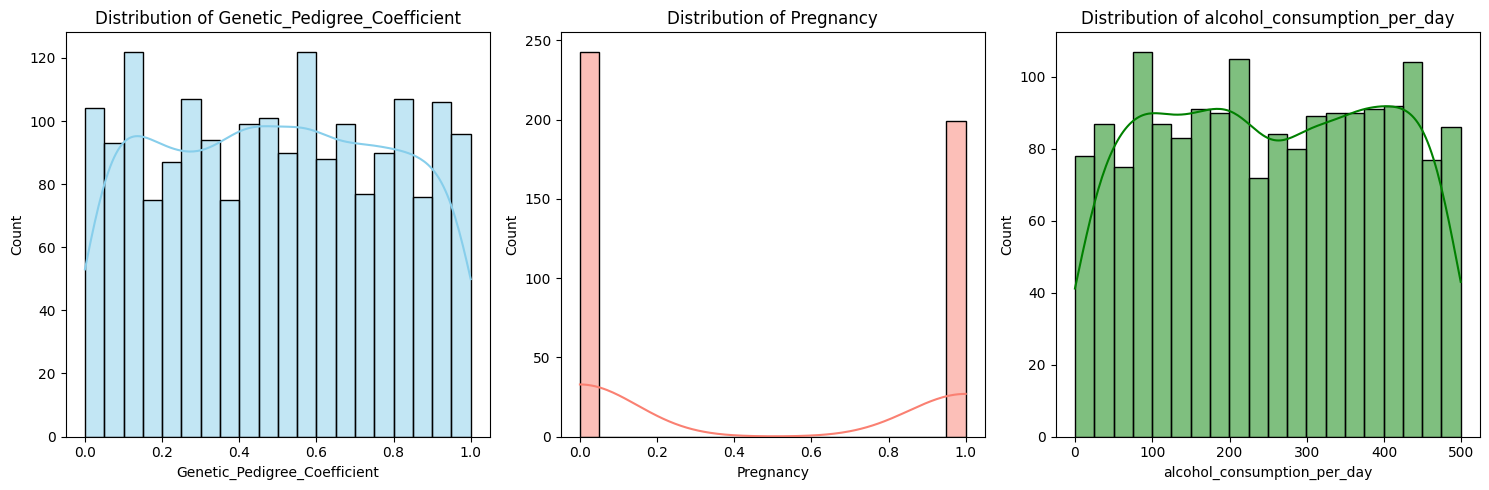

In [7]:
# Columns to plot
columns = ['Genetic_Pedigree_Coefficient', 'Pregnancy', 'alcohol_consumption_per_day']
colors = ['skyblue', 'salmon', 'green']
titles = ['Distribution of Genetic_Pedigree_Coefficient', 'Distribution of Pregnancy', 'Distribution of alcohol_consumption_per_day']

# Set up the plot size
plt.figure(figsize=(15, 5))

# Plot histograms for the columns
for i, col in enumerate(columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color=colors[i])
    plt.title(titles[i])

plt.tight_layout()
plt.show()

**3. Checking the boxplots of each columns and their central values**

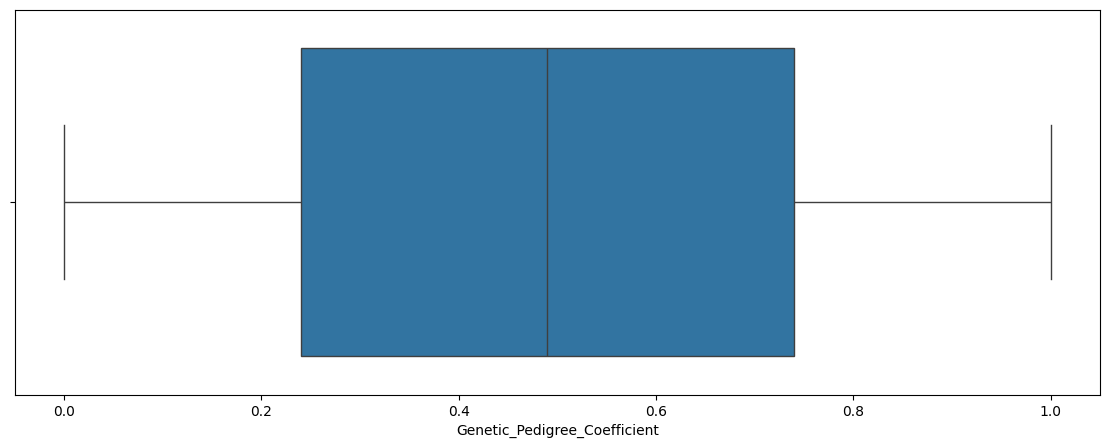

 Median: 0.49 
 Mean: 0.49481656184486367 



In [8]:
# Genetic_Pedigree_Coefficient box plot
plt.figure(figsize= (14,5))
sns.boxplot(df, x= df['Genetic_Pedigree_Coefficient'])
plt.show()

# printing central values
print(" Median:", df['Genetic_Pedigree_Coefficient'].median(),"\n",
      'Mean:',df['Genetic_Pedigree_Coefficient'].mean(),'\n')


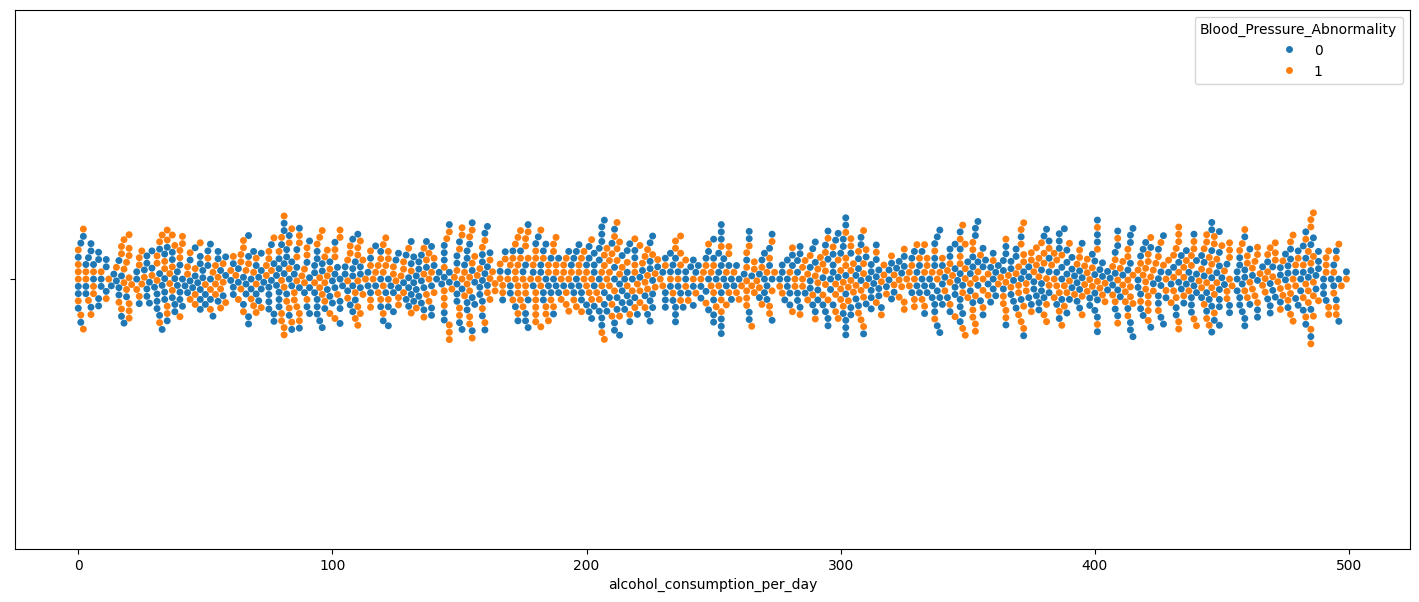

 Median: 250.0 
 Mean: 251.00853242320818 



In [9]:
plt.figure(figsize= (18,7))
sns.swarmplot(df,x= 'alcohol_consumption_per_day', hue = "Blood_Pressure_Abnormality")
plt.show()

# printing central values
print(" Median:", df['alcohol_consumption_per_day'].median(),"\n",
      'Mean:',df['alcohol_consumption_per_day'].mean(),'\n')

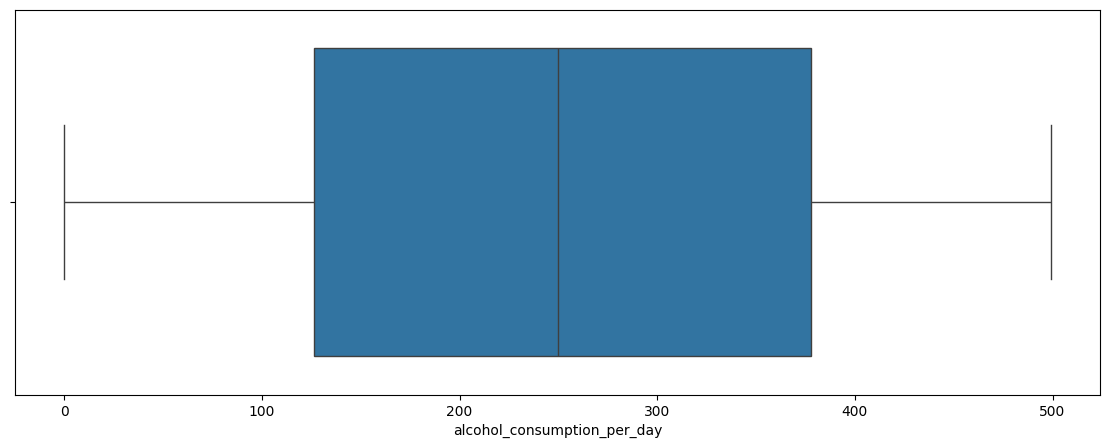

 Median: 250.0 
 Mean: 251.00853242320818 



In [10]:
plt.figure(figsize= (14,5))
sns.boxplot(df, x= df['alcohol_consumption_per_day'])
plt.show()

# printing central values
print(" Median:", df['alcohol_consumption_per_day'].median(),"\n",
      'Mean:',df['alcohol_consumption_per_day'].mean(),'\n')

**4. Filling Missing values**

In [11]:
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(df['Genetic_Pedigree_Coefficient'].median())
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean())


*All missing Values have been filled with suitable central values*

In [12]:
df = df.drop('Pregnancy', axis=1)

**5. Confirming All missing values are cleaned**

In [13]:
df.isna().sum()

Patient_Number                   0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
Blood_Pressure_Abnormality       0
dtype: int64

*Result: Data is cleaning and has no missing values*

## **Understanding Blood_Pressure_Abnormality Values**
- To check if there is correlation between colums

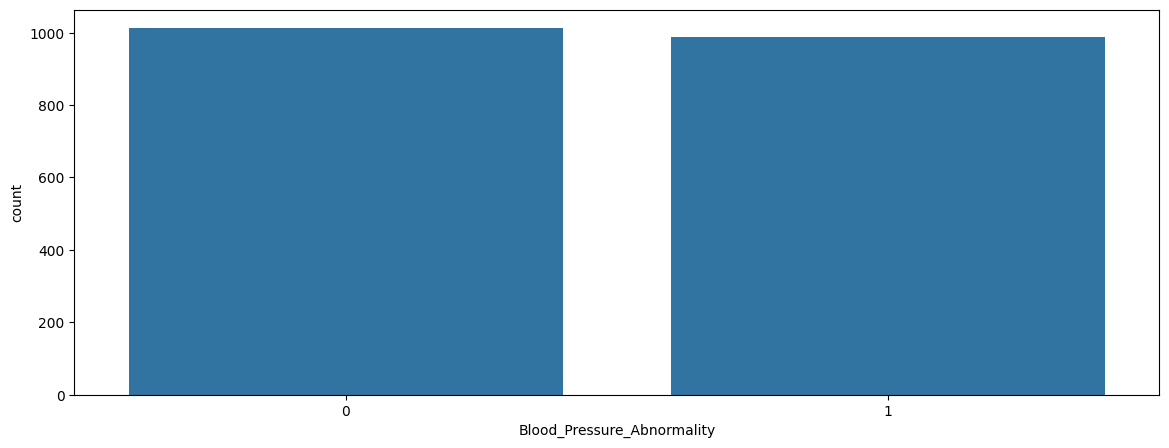

In [14]:
# Counting Water Potability
plt.figure(figsize= (14,5))
sns.countplot(df, x= df['Blood_Pressure_Abnormality'])
plt.show()

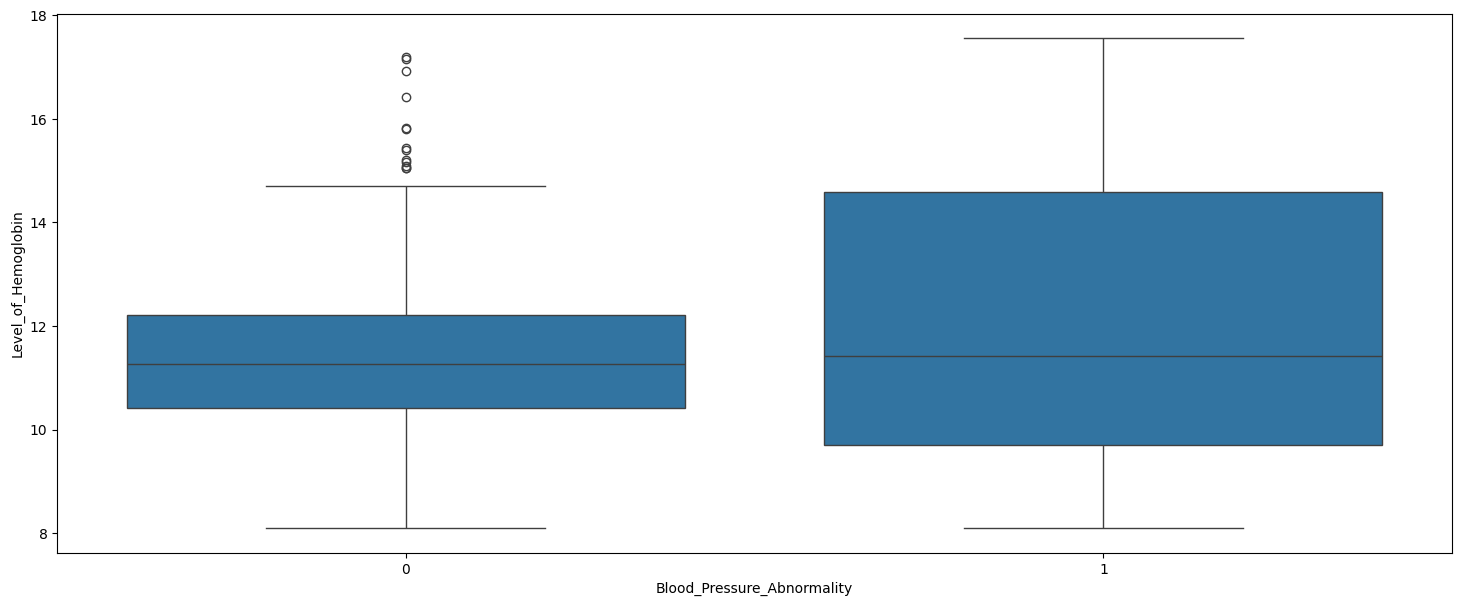

In [15]:
# Boxplot Blood_Pressure_Abnormality based on Level_of_Hemoglobin
plt.figure(figsize= (18,7))
sns.boxplot(df,y='Level_of_Hemoglobin',x='Blood_Pressure_Abnormality')
plt.show()

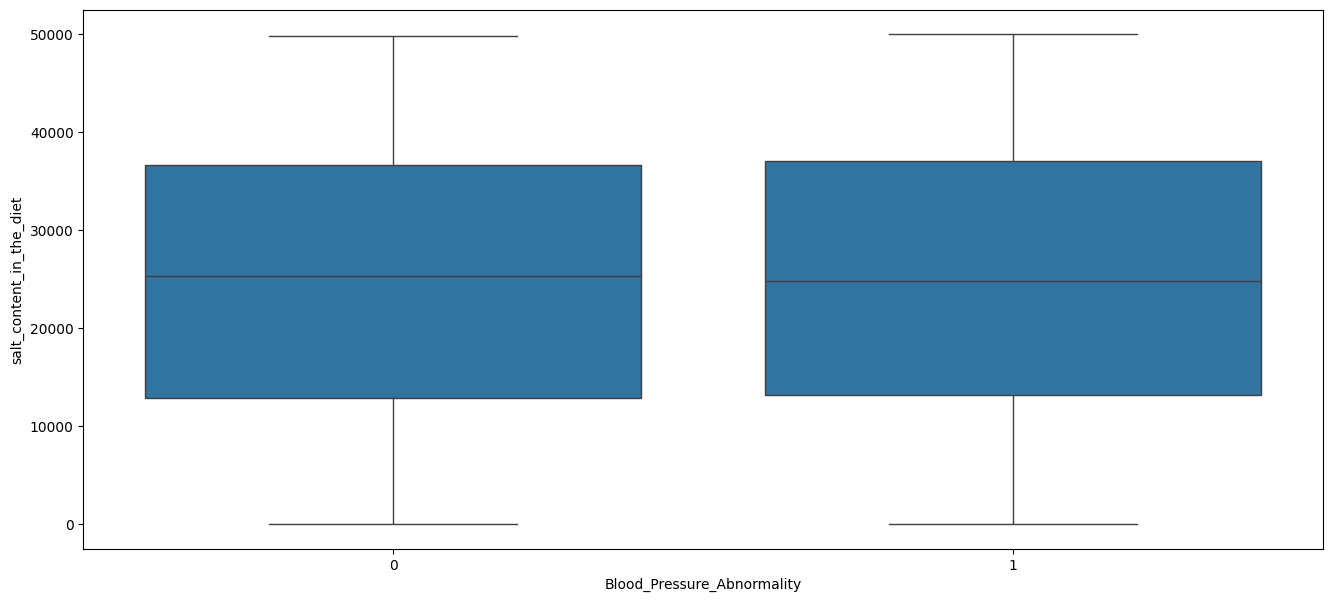

In [16]:
# Boxplot Blood_Pressure_Abnormality based on salt_content_in_the_diet
plt.figure(figsize= (16,7))
sns.boxplot(df,y='salt_content_in_the_diet',x='Blood_Pressure_Abnormality')
plt.show()

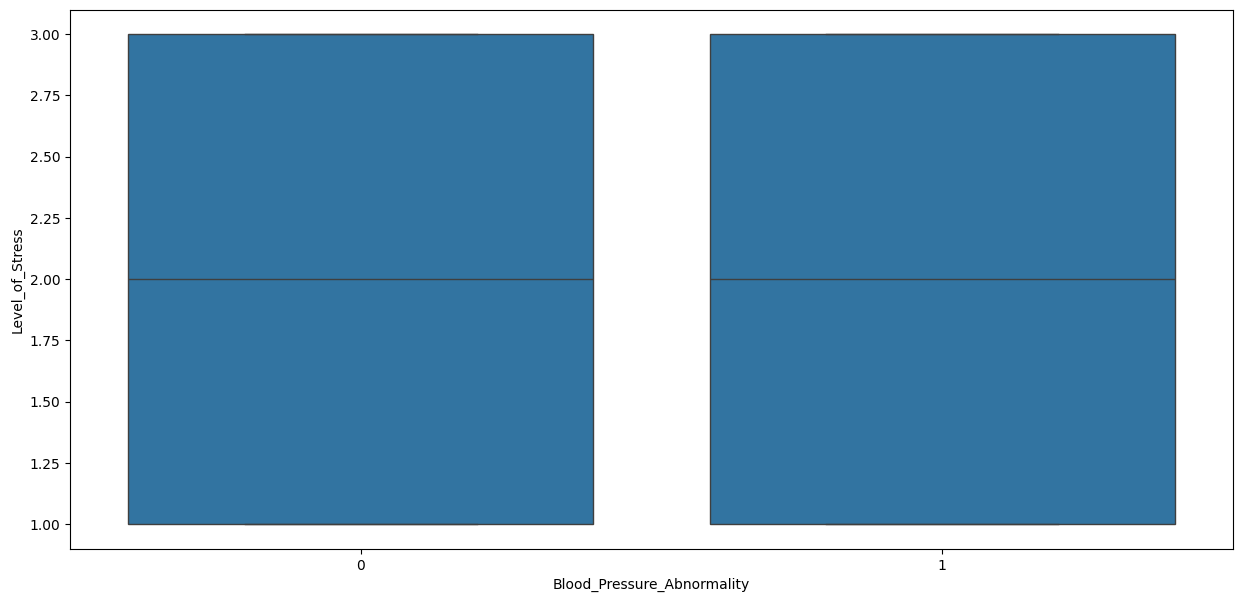

In [17]:
# Boxplot Blood_Pressure_Abnormality based on Level_of_Stress
plt.figure(figsize= (15,7))
sns.boxplot(df,y='Level_of_Stress',x='Blood_Pressure_Abnormality')
plt.show()

In [18]:
# Check which parameters are correlated with "Blood_Pressure_Abnormality".
df_corr = df.corr() * 100
df_corr["Blood_Pressure_Abnormality"].sort_values(ascending = False)

Blood_Pressure_Abnormality       100.000000
Chronic_kidney_disease            42.918773
Adrenal_and_thyroid_disorders     31.859838
Level_of_Hemoglobin               13.948754
Sex                                5.490240
BMI                                4.019295
Physical_activity                  3.795164
Patient_Number                     2.142988
alcohol_consumption_per_day        1.945927
salt_content_in_the_diet           1.419871
Smoking                            1.225025
Level_of_Stress                    0.930427
Genetic_Pedigree_Coefficient      -3.242150
Age                               -6.632161
Name: Blood_Pressure_Abnormality, dtype: float64

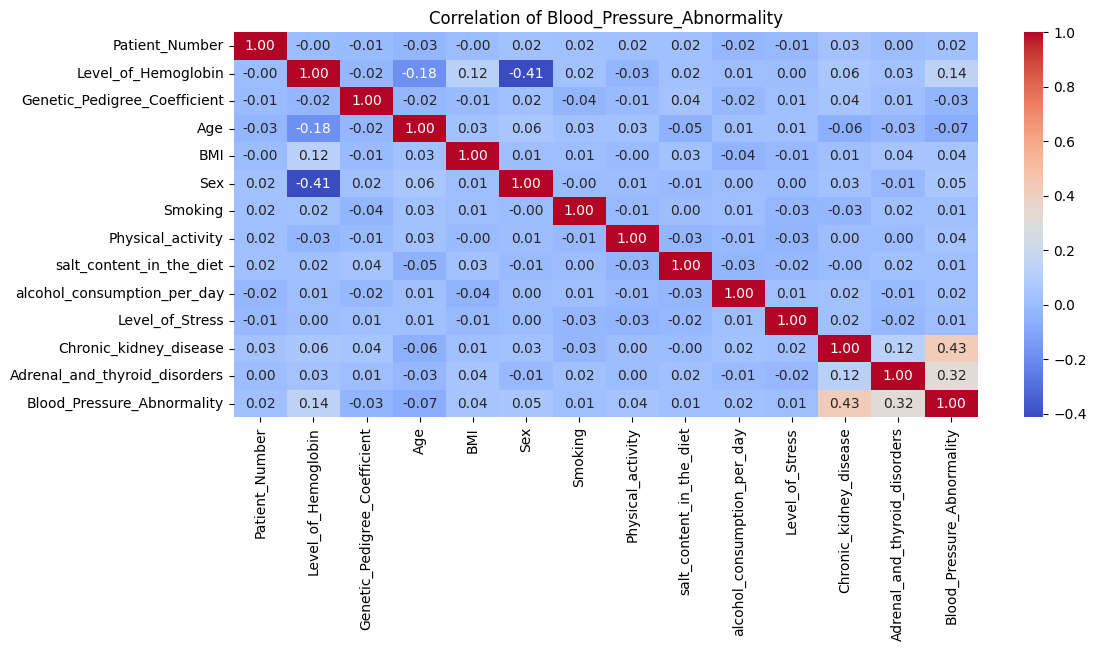

In [19]:
plt.figure(figsize= (12,5))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title("Correlation of Blood_Pressure_Abnormality")
plt.show()

## **Data Visualizations**

**1.Frequenccy Distribution of each feature**

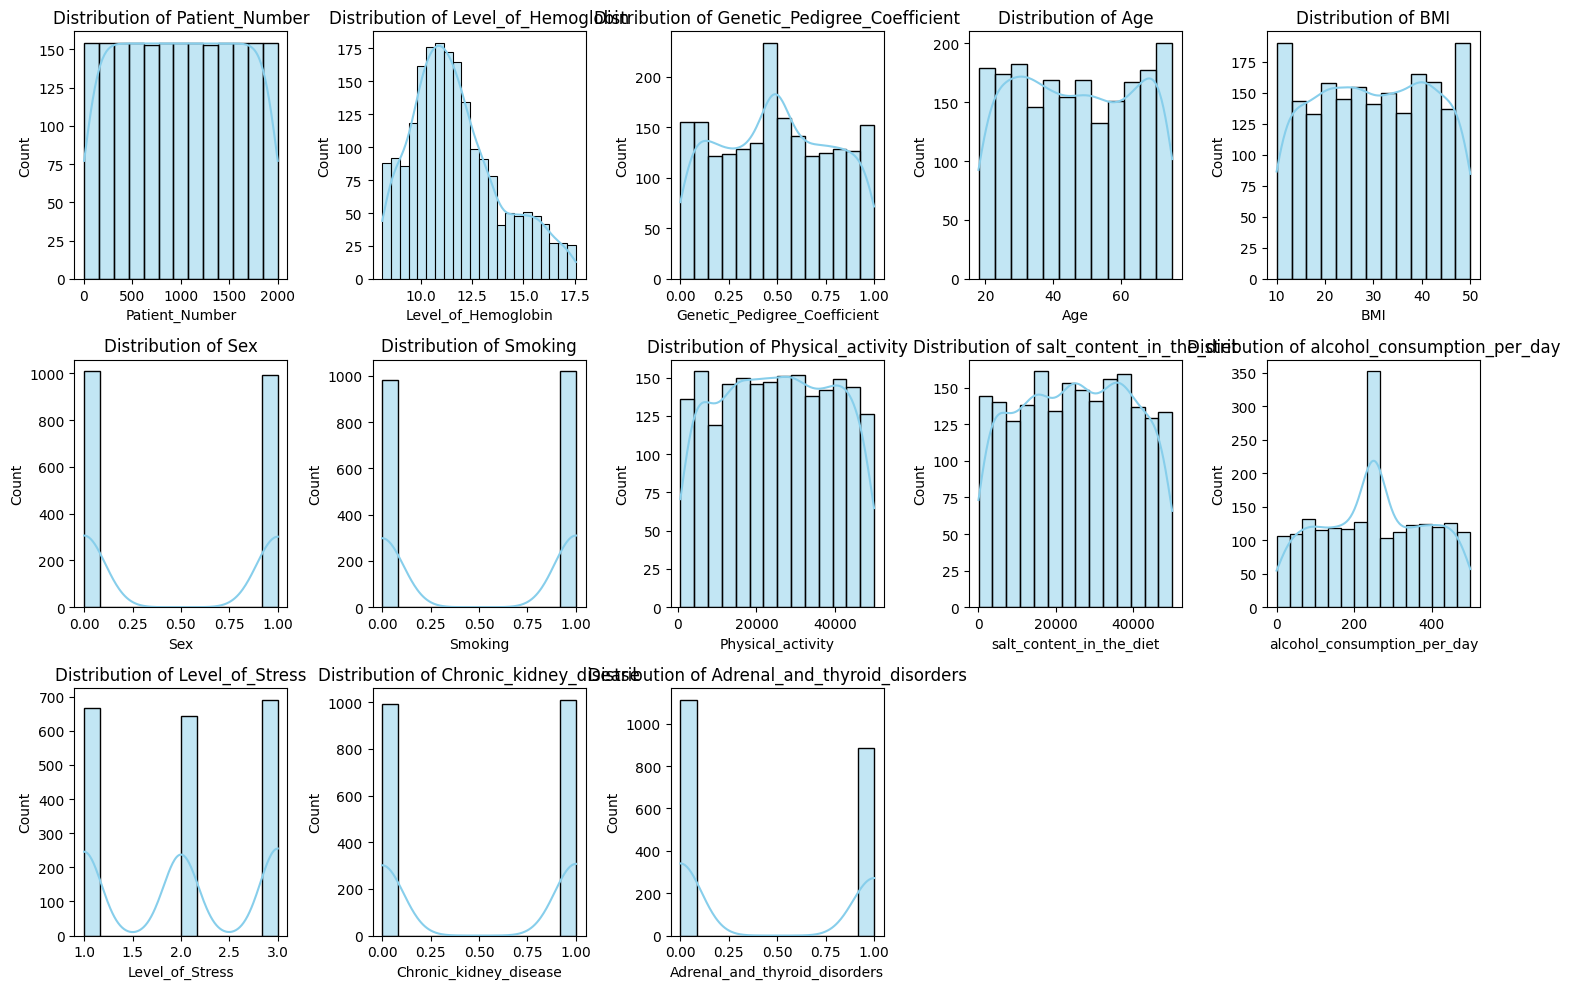

In [20]:
# Set up the plot size
plt.figure(figsize=(15, 10))

# List of features to visualize
features = df.columns.drop('Blood_Pressure_Abnormality')

# Create a subplot for each feature
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)  # Adjust rows and columns as needed
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


**2.Pairplot**

<Figure size 1000x800 with 0 Axes>

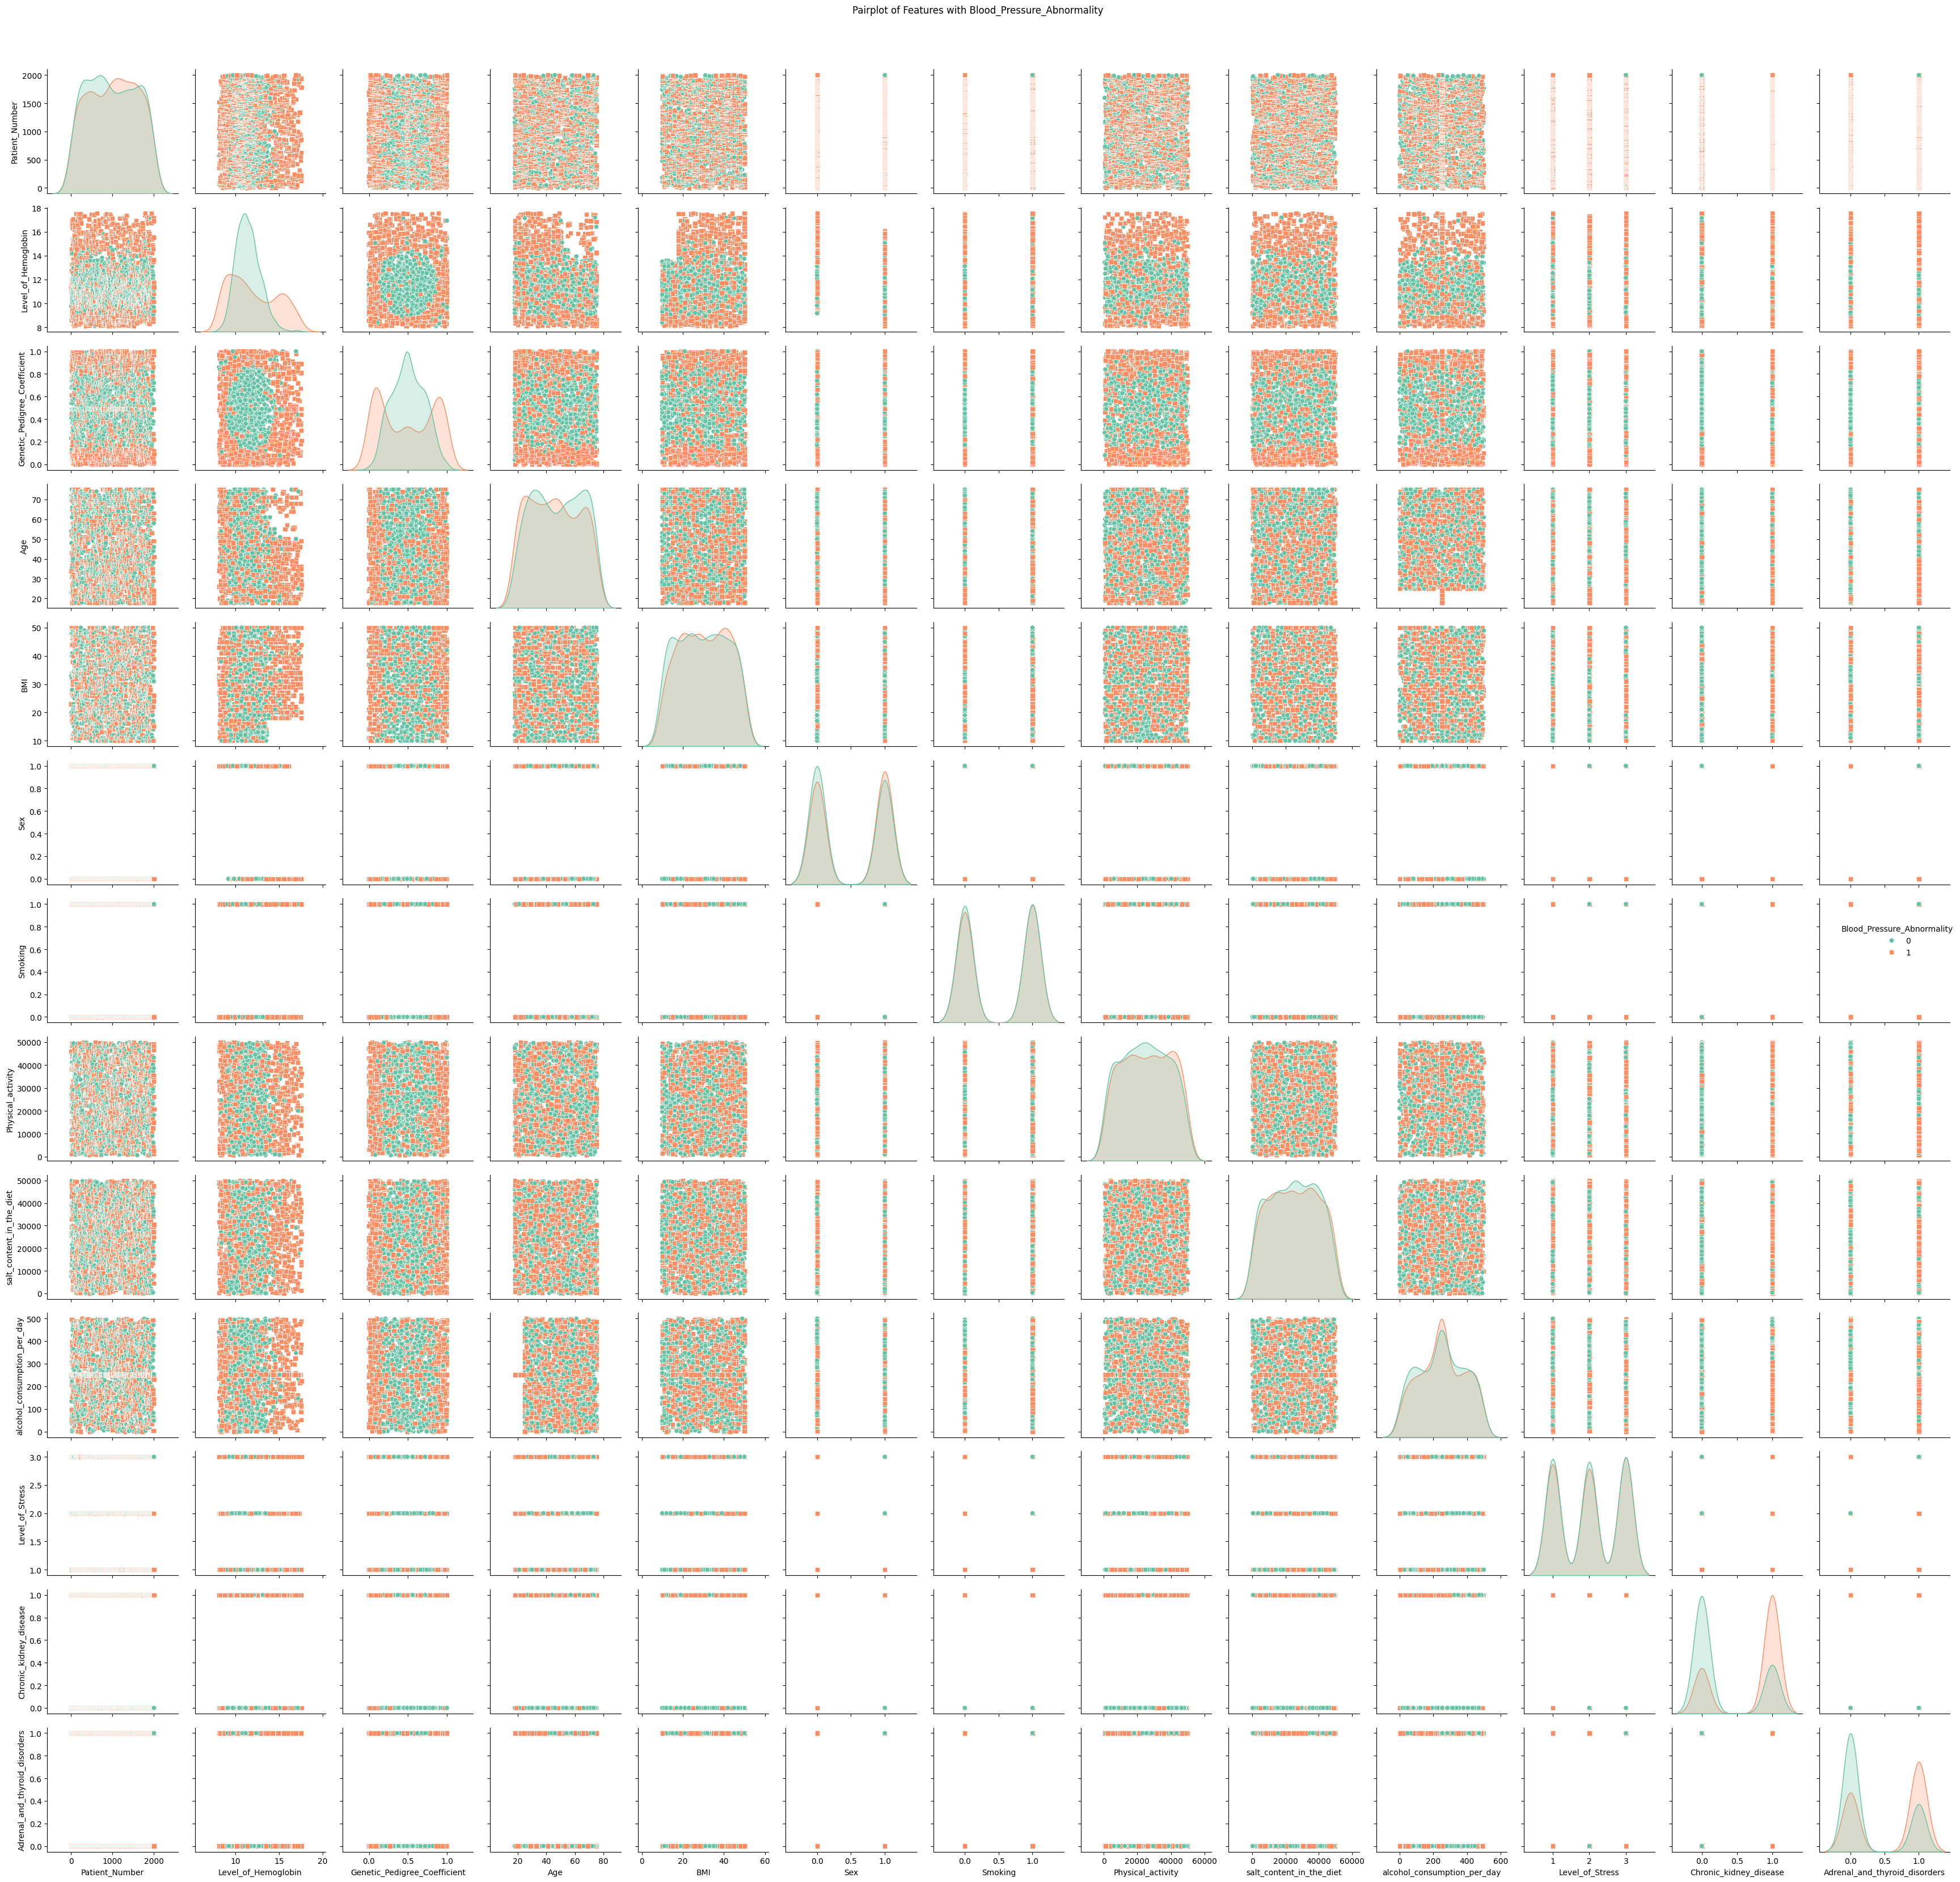

In [21]:
# Set up the plot size
plt.figure(figsize=(10, 8))

# Use seaborn pairplot to visualize relationships between features, focusing on the target column
sns.pairplot(df, hue='Blood_Pressure_Abnormality', palette='Set2', markers=["o", "s"])

# Set the title
plt.suptitle('Pairplot of Features with Blood_Pressure_Abnormality', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()


**3.Feature Importance**

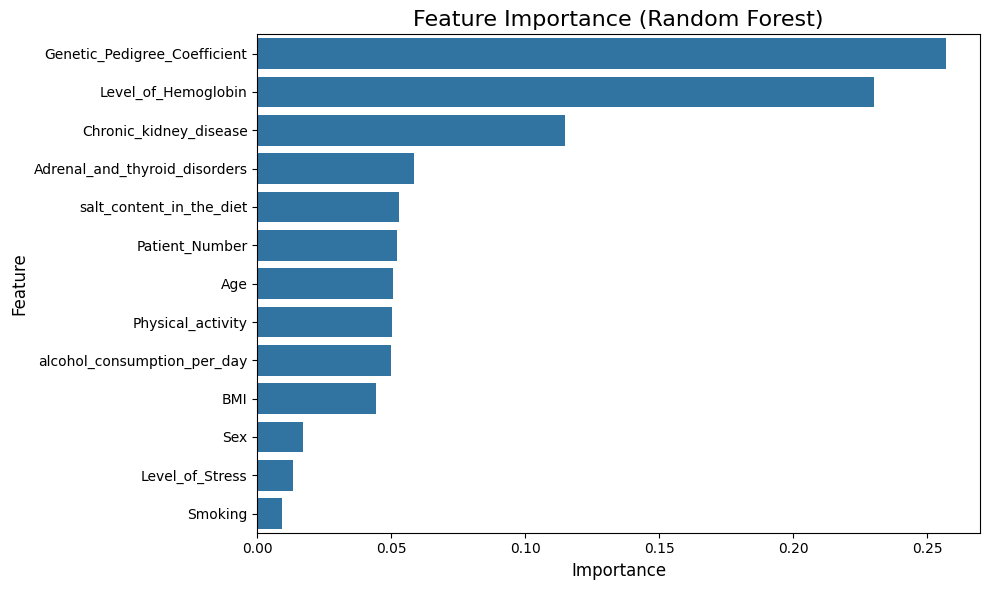

                          Feature  Importance
2    Genetic_Pedigree_Coefficient    0.256898
1             Level_of_Hemoglobin    0.230167
11         Chronic_kidney_disease    0.114802
12  Adrenal_and_thyroid_disorders    0.058534
8        salt_content_in_the_diet    0.052745
0                  Patient_Number    0.052248
3                             Age    0.050595
7               Physical_activity    0.050438
9     alcohol_consumption_per_day    0.049806
4                             BMI    0.044209
5                             Sex    0.017086
10                Level_of_Stress    0.013222
6                         Smoking    0.009250


In [22]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target (y)
X = df.drop('Blood_Pressure_Abnormality', axis=1)
y = df['Blood_Pressure_Abnormality']

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X, y)

# Get the feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the feature importances as a bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Set the title and labels
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the feature importance scores
print(feature_importance_df)


In [23]:
df

Patient_Number  Level_of_Hemoglobin  Genetic_Pedigree_Coefficient  Age  \
0                  1                11.28                          0.90   34   
1                  2                 9.75                          0.23   54   
2                  3                10.79                          0.91   70   
3                  4                11.00                          0.43   71   
4                  5                14.17                          0.83   52   
...              ...                  ...                           ...  ...   
1995            1996                10.14                          0.02   69   
1996            1997                11.77                          1.00   24   
1997            1998                16.91                          0.22   18   
1998            1999                11.15                          0.72   46   
1999            2000                11.36                          0.09   41   

      BMI  Sex  Smoking  Physical_activity  salt_content_in_the_diet  \
0      23    1        0              45961                     48071   
1      33    1        0              26106                     25333   
2      49    0        0               9995                     29465   
3      50    0        0              10635                      7439   
4      19    0        0              15619                     49644   
...   ...  ...      ...                ...                       ...   
1995   26    1        1              26118                     47568   
1996   45    1        1               2572                      8063   
1997   42    0        0              14933                     24753   
1998   45    1        1              18157                     15275   
1999   45    0        0              20729                     30463   

      alcohol_consumption_per_day  Level_of_Stress  Chronic_kidney_disease  \
0                      251.008532                2                       1   
1                      205.000000                3                       0   
2                       67.000000                2                       1   
3                      242.000000                1                       1   
4                      397.000000                2                       0   
...                           ...              ...                     ...   
1995                   144.000000                3                       1   
1996                   251.008532                3                       1   
1997                   251.008532                2                       1   
1998                   253.000000                3                       0   
1999                   230.000000                1                       1   

      Adrenal_and_thyroid_disorders  Blood_Pressure_Abnormality  
0                                 1                           1  
1                                 0                           0  
2                                 0                           1  
3                                 0                           0  
4                                 0                           1  
...                             ...                         ...  
1995                              0                           1  
1996                              1                           1  
1997                              1                           1  
1998                              1                           0  
1999                              0                           1  

[2000 rows x 14 columns]

### **Splitting Data**

In [24]:
from imblearn.over_sampling import BorderlineSMOTE
# Split the data into features (X) and target (y)
X = df.drop('Blood_Pressure_Abnormality', axis=1)
y = df['Blood_Pressure_Abnormality']

smote = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

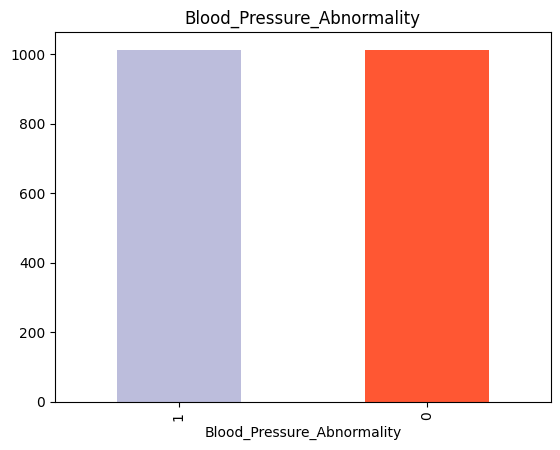

In [25]:
y_smote.value_counts().plot(kind = 'bar', color = ["#bcbddc", "#FF5733"])
plt.title("Blood_Pressure_Abnormality")
plt.show()

*All data points near the borderline have been given synthetic values*

# **TRAINING 1 (no Scaling)**

### **Model 1.1: Random Forest**

In [26]:
# Define the RandomForestClassifier with the best hyperparameters
rf = RandomForestClassifier(bootstrap=True,max_depth=None,min_samples_leaf=2,min_samples_split=2,n_estimators=200
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate metrics
rf_accuracy = round(accuracy_score(y_test, y_pred), 3)
rf_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
rf_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
rf_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Printing classification results
print("Random Forest Classification Results with Best Hyperparameters:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-Score: {rf_f1}")

# Storing results in a dict
rf_results = {
    'Model': 'Random Forest with Best Hyperparameters',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1,
    'Best Hyperparameters': {
        'bootstrap': True,
        'max_depth': None,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 200
    }
}



Random Forest Classification Results with Best Hyperparameters:
Accuracy: 0.915
Precision: 0.916
Recall: 0.915
F1-Score: 0.915


### **Model 1.2: Gaussian Naive Bayes**

In [27]:
# Initialize the Gaussian Naive Bayes model with the best hyperparameters found from RandomizedSearchCV
gnb = GaussianNB(var_smoothing=2.310129700083158e-06)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Calculate metrics with zero_division handling
gnb_accuracy = round(accuracy_score(y_test, y_pred_gnb), 3)
gnb_precision = round(precision_score(y_test, y_pred_gnb, average='weighted', zero_division=1), 3)
gnb_recall = round(recall_score(y_test, y_pred_gnb, average='weighted'), 3)
gnb_f1 = round(f1_score(y_test, y_pred_gnb, average='weighted'), 3)

# Print classification results
print("Gaussian Naive Bayes Classification Results with Best Hyperparameters:")
print(f"Accuracy: {gnb_accuracy}")
print(f"Precision: {gnb_precision}")
print(f"Recall: {gnb_recall}")
print(f"F1-Score: {gnb_f1}")

# Store results in a dictionary for later comparison
gnb_results = {
    'Model': 'Gaussian Naive Bayes with Best Hyperparameters',
    'Accuracy': gnb_accuracy,
    'Precision': gnb_precision,
    'Recall': gnb_recall,
    'F1-Score': gnb_f1,
    'Best Hyperparameters': {'var_smoothing': 2.310129700083158e-06}
}


Gaussian Naive Bayes Classification Results with Best Hyperparameters:
Accuracy: 0.52
Precision: 0.533
Recall: 0.52
F1-Score: 0.503


### **Model 1.3: XGBoosting Classifier**

In [28]:
# Define the XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(subsample=0.8,reg_lambda=0.2,reg_alpha=0.1,n_estimators=300,max_depth=7,learning_rate=0.1,gamma=0.4,colsample_bytree=1.0
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions with the model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 3)
xgb_precision = round(precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1), 3)
xgb_recall = round(recall_score(y_test, y_pred_xgb, average='weighted'), 3)
xgb_f1 = round(f1_score(y_test, y_pred_xgb, average='weighted'), 3)

# Print classification results
print("XGBoost Classification Results with Best Hyperparameters:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1-Score: {xgb_f1}")

# Store results in a dictionary for later comparison
xgb_results = {
    'Model': 'XGBoost with Best Hyperparameters',
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall,
    'F1-Score': xgb_f1
}


XGBoost Classification Results with Best Hyperparameters:
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91


### **Model 1.4: Adaboost Classifier**

In [29]:
# Initialize the AdaBoost classifier with the best hyperparameters
ada_boost = AdaBoostClassifier(learning_rate=1.0, n_estimators=150,algorithm='SAMME')

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_boost.predict(X_test)

# Calculate metrics
ada_accuracy = round(accuracy_score(y_test, y_pred_ada), 3)
ada_precision = round(precision_score(y_test, y_pred_ada, average='weighted', zero_division=1), 3)
ada_recall = round(recall_score(y_test, y_pred_ada, average='weighted'), 3)
ada_f1 = round(f1_score(y_test, y_pred_ada, average='weighted'), 3)

# Print classification results
print("AdaBoost Classification Results:")
print(f"Accuracy: {ada_accuracy}")
print(f"Precision: {ada_precision}")
print(f"Recall: {ada_recall}")
print(f"F1-Score: {ada_f1}")

# Store results in a dictionary for later comparison
ada_results = {
    'Model': 'AdaBoost',
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
}


AdaBoost Classification Results:
Accuracy: 0.912
Precision: 0.913
Recall: 0.912
F1-Score: 0.913


# **TRAINING 2 (Scale Sensitive Models)**

### **Scaling**

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
### **Model 2.1: Logistic Regression**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the Logistic Regression model with the best hyperparameters
lr = LogisticRegression(C=0.1, max_iter=500, penalty='l2', solver='lbfgs')  # Using the best hyperparameters
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = round(accuracy_score(y_test, y_pred_lr), 3)
lr_precision = round(precision_score(y_test, y_pred_lr, average='weighted', zero_division=1), 3)
lr_recall = round(recall_score(y_test, y_pred_lr, average='weighted'), 3)
lr_f1 = round(f1_score(y_test, y_pred_lr, average='weighted'), 3)

# Print classification results
print("Logistic Regression Classification Results with Best Hyperparameters:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-Score: {lr_f1}")

# Store results in a dictionary for later comparison
lr_results = {
    'Model': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1
}


Logistic Regression Classification Results with Best Hyperparameters:
Accuracy: 0.708
Precision: 0.708
Recall: 0.708
F1-Score: 0.708


### **Model 2.2: SVM**

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the SVM model with the best hyperparameters
svm = SVC(C=0.1, kernel='rbf', gamma='scale', degree=3, coef0=0.0)  # Use the hyperparameters you obtained

# Fit the model to the scaled training data
svm.fit(X_train_scaled, y_train)

# Make predictions using the trained model
y_pred_svm = svm.predict(X_test_scaled)

# Calculate the classification metrics
svm_accuracy = round(accuracy_score(y_test, y_pred_svm), 3)
svm_precision = round(precision_score(y_test, y_pred_svm, average='weighted', zero_division=1), 3)
svm_recall = round(recall_score(y_test, y_pred_svm, average='weighted'), 3)
svm_f1 = round(f1_score(y_test, y_pred_svm, average='weighted'), 3)

# Print the results
print("SVM Classification Results with Predefined Hyperparameters:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-Score: {svm_f1}")

# Store results in a dictionary for later comparison
svm_results = {
    'Model': 'SVM with Predefined Hyperparameters',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1-Score': svm_f1
}


SVM Classification Results with Predefined Hyperparameters:
Accuracy: 0.8
Precision: 0.801
Recall: 0.8
F1-Score: 0.799


### **Model 2.3: KNN**

In [34]:
# Train the KNN classifier and make predictions
knn = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors; can be tuned
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate metrics with zero_division handling
knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 3)
knn_precision = round(precision_score(y_test, y_pred_knn, average='weighted', zero_division=1), 3)
knn_recall = round(recall_score(y_test, y_pred_knn, average='weighted'), 3)
knn_f1 = round(f1_score(y_test, y_pred_knn, average='weighted'), 3)

# Print classification results
print("KNN Classification Results:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}")

# Store results in a dictionary for later comparison
knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1-Score': knn_f1
}


KNN Classification Results:
Accuracy: 0.497
Precision: 0.5
Recall: 0.498
F1-Score: 0.497


### **Model 7: Voting Classifier (LogReg + SVM + RandomForest)**

In [35]:
# Define base classifiers (you can include the classifiers you want to vote on)
rf = RandomForestClassifier()
lr = LogisticRegression()
svm = SVC()

# Create the Voting Classifier (Voting='hard' for majority voting, 'soft' for probability averaging)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('svm', svm)], voting='hard')

# Train the Voting Classifier and make predictions
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics with zero_division handling
voting_accuracy = round(accuracy_score(y_test, y_pred_voting), 3)
voting_precision = round(precision_score(y_test, y_pred_voting, average='weighted', zero_division=1), 3)
voting_recall = round(recall_score(y_test, y_pred_voting, average='weighted'), 3)
voting_f1 = round(f1_score(y_test, y_pred_voting, average='weighted'), 3)

# Print classification results
print("Voting Classifier Classification Results:")
print(f"Accuracy: {voting_accuracy}")
print(f"Precision: {voting_precision}")
print(f"Recall: {voting_recall}")
print(f"F1-Score: {voting_f1}")

# Store results in a dictionary for later comparison
voting_results = {
    'Model': 'Voting Classifier',
    'Accuracy': voting_accuracy,
    'Precision': voting_precision,
    'Recall': voting_recall,
    'F1-Score': voting_f1
}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Classification Results:
Accuracy: 0.718
Precision: 0.741
Recall: 0.718
F1-Score: 0.713


### **Model 8: Stacking Classifier (LogReg + RandomForest + SVM)**

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define base models (classifiers) for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=2, min_samples_split=2)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

# Define the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Calculate metrics
stacking_accuracy = round(accuracy_score(y_test, y_pred), 3)
stacking_precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
stacking_recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
stacking_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

# Printing classification results
print("Stacking Classifier Results:")
print(f"Accuracy: {stacking_accuracy}")
print(f"Precision: {stacking_precision}")
print(f"Recall: {stacking_recall}")
print(f"F1-Score: {stacking_f1}")

# Storing results in a dict
stacking_results = {
    'Model': 'Stacking Classifier',
    'Accuracy': stacking_accuracy,
    'Precision': stacking_precision,
    'Recall': stacking_recall,
    'F1-Score': stacking_f1,
    'Base Learners': base_learners,
    'Meta Model': 'Logistic Regression'
}

# Optionally, print the base learners and meta model
print(f"Base Learners: {stacking_results['Base Learners']}")
print(f"Meta Model: {stacking_results['Meta Model']}")


Stacking Classifier Results:
Accuracy: 0.927
Precision: 0.927
Recall: 0.928
F1-Score: 0.927
Base Learners: [('rf', RandomForestClassifier(min_samples_leaf=2, n_estimators=200)), ('gb', GradientBoostingClassifier())]
Meta Model: Logistic Regression


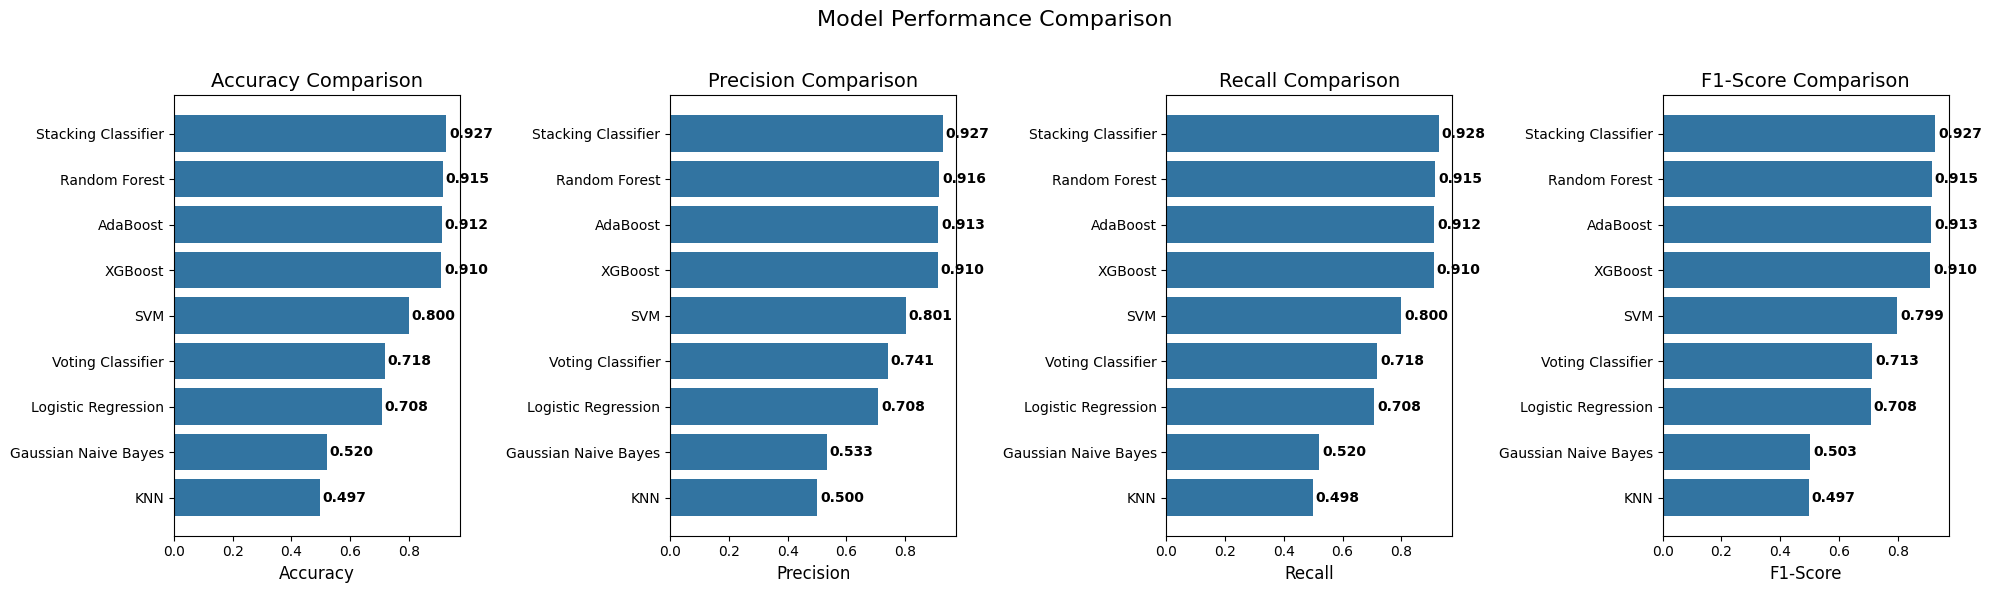

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Store all performance metrics in dictionaries for comparison
metrics = {
    'Logistic Regression': {'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'F1-Score': lr_f1},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1-Score': svm_f1},
    'KNN': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1-Score': knn_f1},
    'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-Score': rf_f1},
    'Gaussian Naive Bayes': {'Accuracy': gnb_accuracy, 'Precision': gnb_precision, 'Recall': gnb_recall, 'F1-Score': gnb_f1},
    'AdaBoost': {'Accuracy': ada_accuracy, 'Precision': ada_precision, 'Recall': ada_recall, 'F1-Score': ada_f1},
    'Voting Classifier': {'Accuracy': voting_accuracy, 'Precision': voting_precision, 'Recall': voting_recall, 'F1-Score': voting_f1},
    'Stacking Classifier': {'Accuracy': stacking_accuracy, 'Precision': stacking_precision, 'Recall': stacking_recall, 'F1-Score': stacking_f1},
    'XGBoost': {'Accuracy': xgb_accuracy, 'Precision': xgb_precision, 'Recall': xgb_recall, 'F1-Score': xgb_f1}
}

# Prepare the data for plotting
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(metrics.keys())

# Set up the plot for all metrics
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Plot each metric
for i, metric in enumerate(metric_names):
    # Extract the values for the current metric
    model_metric_values = [metrics[model][metric] for model in model_names]

    # Sort models by the current metric
    sorted_metrics = sorted(zip(model_metric_values, model_names))
    sorted_metric_values, sorted_model_names = zip(*sorted_metrics)

    # Create the bar plot
    axes[i].barh(sorted_model_names, sorted_metric_values, color='#3274a1')
    axes[i].set_xlabel(metric, fontsize=12)
    axes[i].set_title(f'{metric} Comparison', fontsize=14)

    # Add the metric values on the bars
    for j, v in enumerate(sorted_metric_values):
        axes[i].text(v + 0.01, j, f'{v:.3f}', ha='left', va='center', fontweight='bold')

# Add overall title and adjust layout
fig.suptitle('Model Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap with suptitle

# Show the plots
plt.show()


- * Stacking Classifier, AdaBoost, XGboost and Random Forest are the best models here
